# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

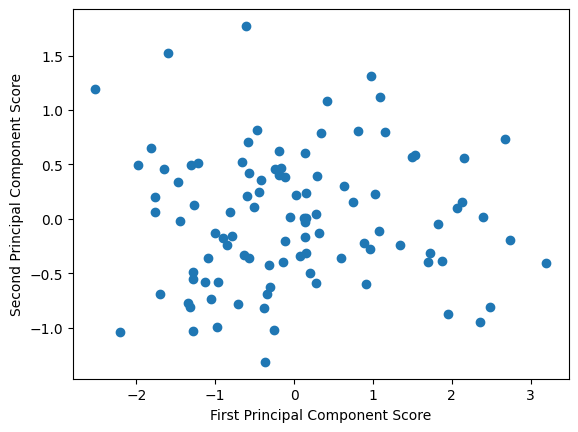

In [90]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

What can be said about the three outliers in the upper left?
First principal component score: Low (because they are far left on the x-axis).

Second principal component score: High (because they are high on the y-axis).

What does that mean about their original values?
PCA intuition
The first principal component captures most of the shared variation, especially driven by series_1 (which strongly influences both series_2 and series_3).

The second principal component captures variation orthogonal to the first, often capturing differences not explained by the first (e.g., residual variation).

series_3
You can say something about series_3 because it had more noise than series_2 and was more weakly correlated with series_1. So points with large second component scores are likely to have deviations mostly in series_3.

Why can’t you easily say about series_1 and series_2?
series_1 and series_2 are highly correlated, since:

series_2 = series_1 * (1 + small_noise)

Their variation is almost fully captured by the first component.

Because they move together, their differences are small, so the second component doesn't provide info to separate them.

Thus, we cannot tell the relative values between series_1 and series_2 based only on second component scores.

Relationship of series_1 and series_2

series_2 is essentially a slightly noisy copy of series_1.

Very strong linear relationship, almost collinear.

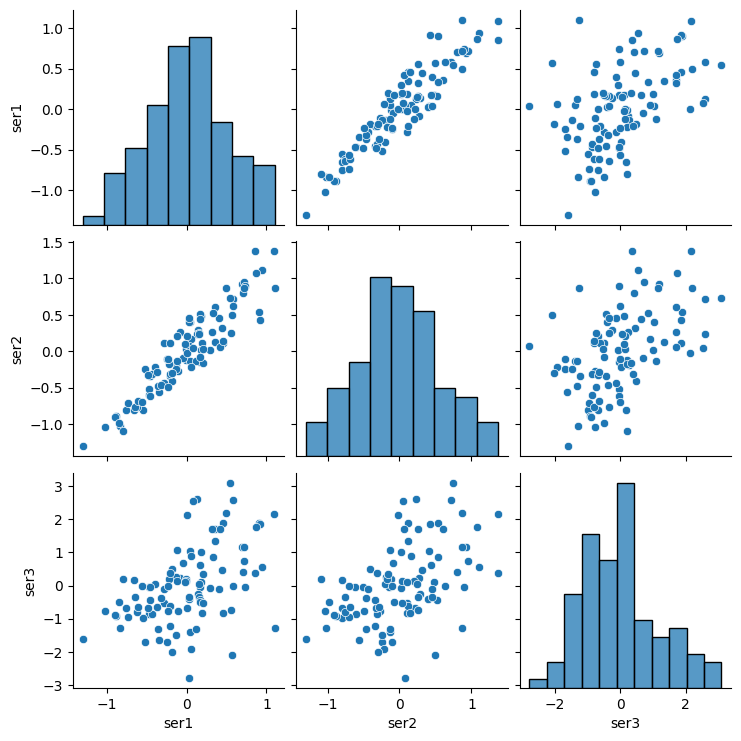

In [91]:
import seaborn as sns

sns.pairplot(df)
plt.show()

Pairplot shows:
strong linear relationships between series_1 and series_2.

series_3 will show more spread (wider "cloud"), because it has more noise.

Advantages & disadvantages of PCA scatter plot
✅ Advantages
Shows major variation patterns succinctly (dimensionality reduction).

Highlights outliers or extreme observations clearly.

Helps reveal groupings or structure.

❌ Disadvantages
Hard to directly interpret what high or low scores mean in terms of original variables.

Loses some detail: can’t easily infer exact original values.

Relative contributions of similar variables (like series_1 vs series_2) can’t be separated.

✅ Does this graph show anything interesting?
Yes!

Shows most data are well-explained by first PC, tightly clustered around origin.

Reveals three outlier points with large second component scores → these likely have unusual deviations mainly in series_3.

Confirms series_1 and series_2 are tightly related (they don't scatter away separately).

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("colorectal_cancer_dataset.csv")

In [93]:
# Show first few rows to understand it
print(df.head())

   Patient_ID Country  Age Gender Cancer_Stage  Tumor_Size_mm Family_History  \
0           1      UK   77      M    Localized             69             No   
1           2      UK   59      M    Localized             33             No   
2           3   Japan   66      M     Regional             17             No   
3           4     USA   83      M     Regional             14             No   
4           5  France   66      M    Localized             34             No   

  Smoking_History Alcohol_Consumption Obesity_BMI  ... Survival_5_years  \
0              No                 Yes  Overweight  ...              Yes   
1              No                  No  Overweight  ...              Yes   
2             Yes                  No      Normal  ...              Yes   
3              No                  No       Obese  ...              Yes   
4             Yes                  No      Normal  ...              Yes   

  Mortality Healthcare_Costs Incidence_Rate_per_100K Mortality_Rate_

In [94]:
# Check data types
print(df.dtypes)

Patient_ID                     int64
Country                       object
Age                            int64
Gender                        object
Cancer_Stage                  object
Tumor_Size_mm                  int64
Family_History                object
Smoking_History               object
Alcohol_Consumption           object
Obesity_BMI                   object
Diet_Risk                     object
Physical_Activity             object
Diabetes                      object
Inflammatory_Bowel_Disease    object
Genetic_Mutation              object
Screening_History             object
Early_Detection               object
Treatment_Type                object
Survival_5_years              object
Mortality                     object
Healthcare_Costs               int64
Incidence_Rate_per_100K        int64
Mortality_Rate_per_100K        int64
Urban_or_Rural                object
Economic_Classification       object
Healthcare_Access             object
Insurance_Status              object
S

In [95]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [96]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()

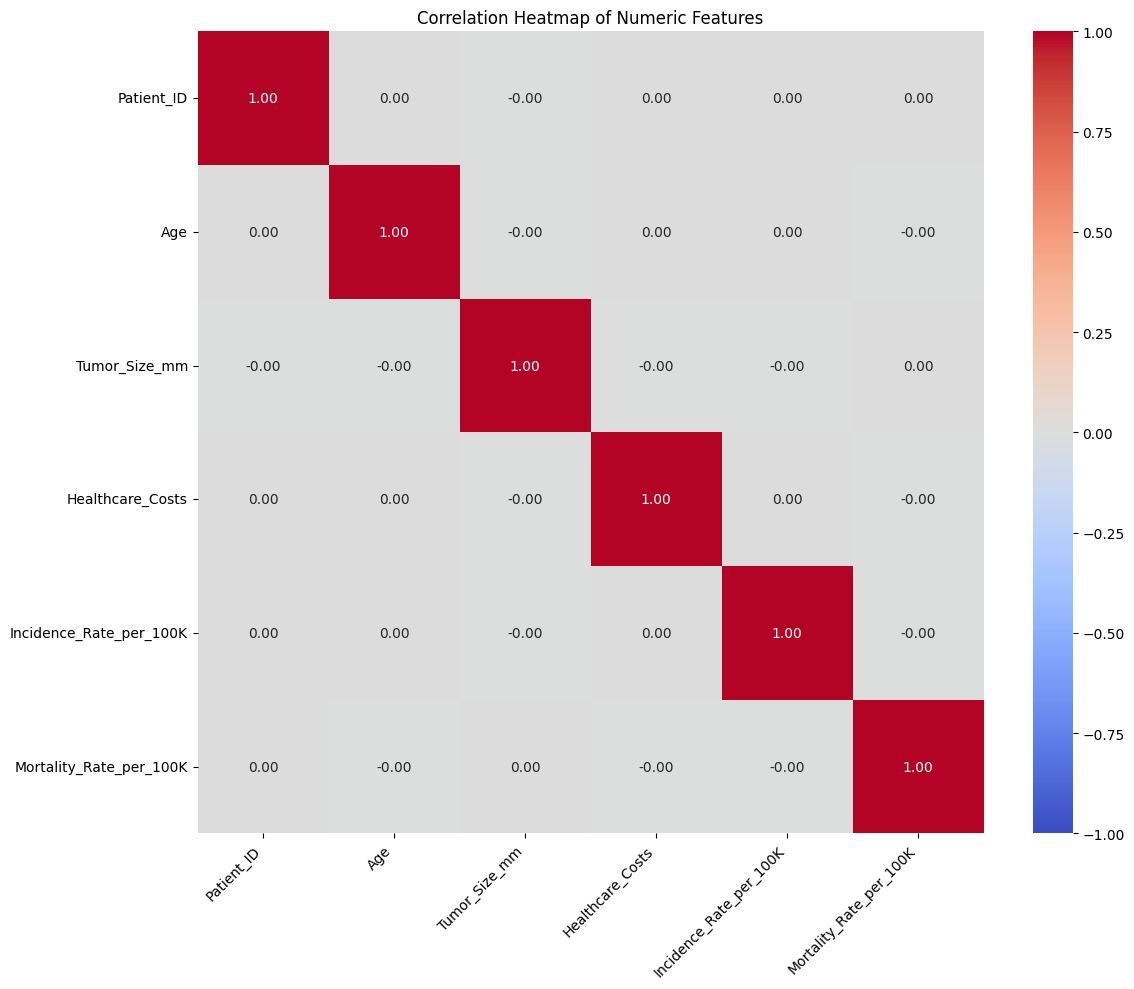

In [97]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

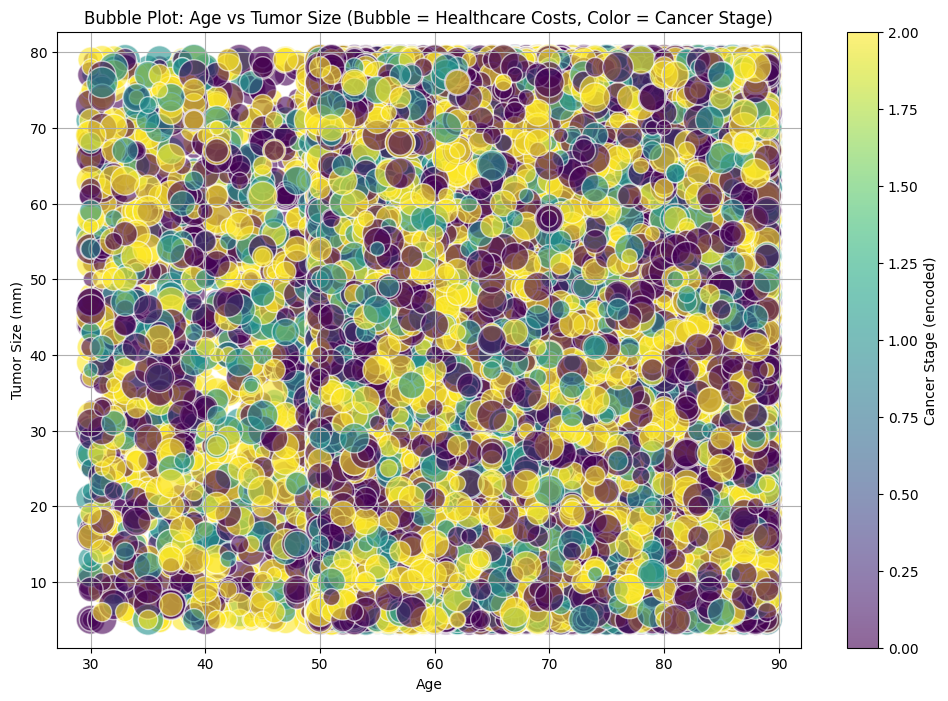

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (replace with your path)
df = pd.read_csv("colorectal_cancer_dataset.csv")

# Clean: remove rows with missing critical values (optional)
df = df[['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Cancer_Stage']].dropna()

# Normalize bubble sizes
sizes = df['Healthcare_Costs'] / df['Healthcare_Costs'].max() * 500  # Adjust factor if needed

# Create plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Age'],
    df['Tumor_Size_mm'],
    s=sizes,
    c=pd.Categorical(df['Cancer_Stage']).codes,  # Encode Cancer_Stage numerically for color
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.xlabel("Age")
plt.ylabel("Tumor Size (mm)")
plt.title("Bubble Plot: Age vs Tumor Size (Bubble = Healthcare Costs, Color = Cancer Stage)")
plt.colorbar(scatter, label="Cancer Stage (encoded)")
plt.grid(True)
plt.show()

Explained variance ratios: [0.20183164 0.20025286 0.19988391 0.19931259 0.19871899]
First principal component vector: [ 0.47723238 -0.27668263  0.60558063  0.30280222 -0.48711281]


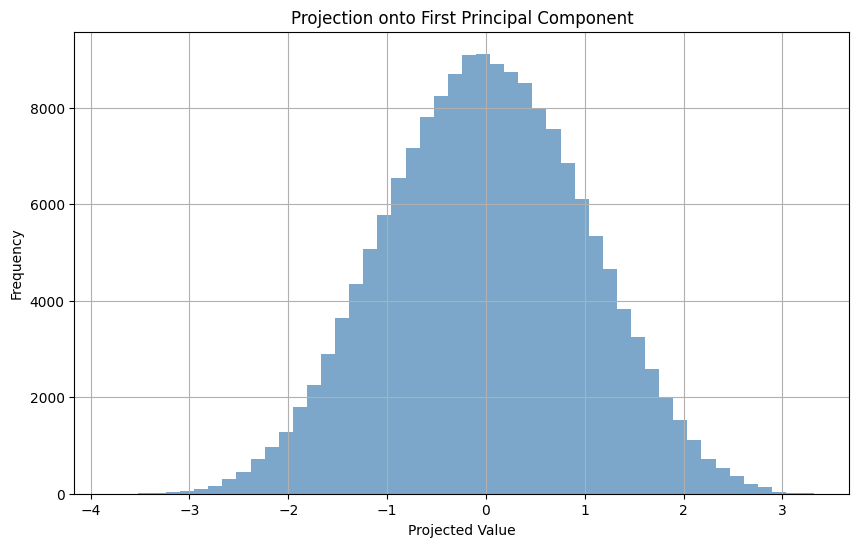

Variance captured by first principal component: 20.18%


In [99]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("colorectal_cancer_dataset.csv")

# Select numeric columns for PCA
numeric_cols = ['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 
                'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']

# Drop rows with missing values in these columns
pca_df = df[numeric_cols].dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance)

# First principal component
first_pc = pca.components_[0]
print("First principal component vector:", first_pc)

# Projection onto first principal component
projected = scaled_data.dot(first_pc)

# Plot histogram of projections
plt.figure(figsize=(10, 6))
plt.hist(projected, bins=50, alpha=0.7, color='steelblue')
plt.title("Projection onto First Principal Component")
plt.xlabel("Projected Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Variance captured by first PC
print(f"Variance captured by first principal component: {explained_variance[0]:.2%}")

How much variance is captured?
The first principal component's explained variance ratio tells us how much of the total data variation is captured.

Example: If explained_variance[0] = 0.72, it means 72% of variance is explained by the first component alone.

Can we represent data using only this component?
Yes! The projection onto the first PC is a 1D representation capturing most variation.

We can approximate or visualize data in a "compressed" form using only this projection.

In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Choose predictors
numeric_features = ['Age', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']

target = 'Tumor_Size_mm'

# Drop missing
data = df[numeric_features + [target]].dropna()

results = {}

for feature in numeric_features:
    X = data[[feature]].values
    y = data[target].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    results[feature] = r2

# Sort and show
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
print("R² scores for predicting Tumor_Size_mm using individual features:")
for feature, score in sorted_results.items():
    print(f"{feature}: {score:.3f}")

R² scores for predicting Tumor_Size_mm using individual features:
Age: 0.000
Mortality_Rate_per_100K: 0.000
Incidence_Rate_per_100K: 0.000


In [101]:
X = data[numeric_features].values
y = data[target].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_combined = r2_score(y, y_pred)
print(f"\nCombined R² score: {r2_combined:.3f}")


Combined R² score: 0.000


In [102]:
target = 'Healthcare_Costs'
data = df[numeric_features + [target]].dropna()

results = {}

for feature in numeric_features:
    X = data[[feature]].values
    y = data[target].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    results[feature] = r2

# Sort
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
print("\nR² scores for predicting Healthcare_Costs using individual features:")
for feature, score in sorted_results.items():
    print(f"{feature}: {score:.3f}")


R² scores for predicting Healthcare_Costs using individual features:
Mortality_Rate_per_100K: 0.000
Age: 0.000
Incidence_Rate_per_100K: 0.000


In [103]:
X = data[numeric_features].values
y = data[target].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_combined = r2_score(y, y_pred)
print(f"\nCombined R² score for Healthcare_Costs: {r2_combined:.3f}")


Combined R² score for Healthcare_Costs: 0.000


In [104]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_encoded = df.copy()

# Automatically find all object (string) columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Encode each
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Define your features
features_to_use = ['Age', 'Mortality_Rate_per_100K', 'Incidence_Rate_per_100K', 
                   'Obesity_BMI', 'Physical_Activity', 'Alcohol_Consumption', 
                   'Smoking_History', 'Diabetes', 'Inflammatory_Bowel_Disease', 
                   'Genetic_Mutation', 'Screening_History', 'Cancer_Stage']

target = 'Tumor_Size_mm'

# Drop missing rows
data = df_encoded[features_to_use + [target]].dropna()

X = data[features_to_use].values
y = data[target].values

# Fit linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Multivariate model R² score for predicting {target}: {r2:.3f}")

Multivariate model R² score for predicting Tumor_Size_mm: 0.000


What does R² ≈ 0 mean in multivariate regression?
The model cannot explain any variability in the target (Tumor_Size_mm), even after using all features together.

It performs no better than simply predicting the mean tumor size for all patients.

Why is this happening? Possible reasons
Tumor size might not have strong linear relationships
It might depend on other biological or genetic factors not included in your dataset.

The relationships could be nonlinear (e.g., thresholds, interactions).

Categorical features were label-encoded as ordered numbers
Label encoding can mislead linear models if the categories do not have true ordinal meaning (e.g., 'Low' = 0, 'Medium' = 1, 'High' = 2 — these numbers imply ordering and linear distances).

Linear regression tries to fit lines based on these numeric codes, which may not represent real effects.

Possible data quality issues
There might be little or no variation in tumor size in your data (e.g., if most values are similar or clustered).

Outliers or incorrect data entries can also affect results.

In [105]:
import pandas as pd

# Load dataset
df1 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Check first few rows
print(df1.head())

# Check column types
print(df1.dtypes)

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [106]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

print(numeric_df.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [107]:
# Compute correlation
corr_matrix = numeric_df.corr()

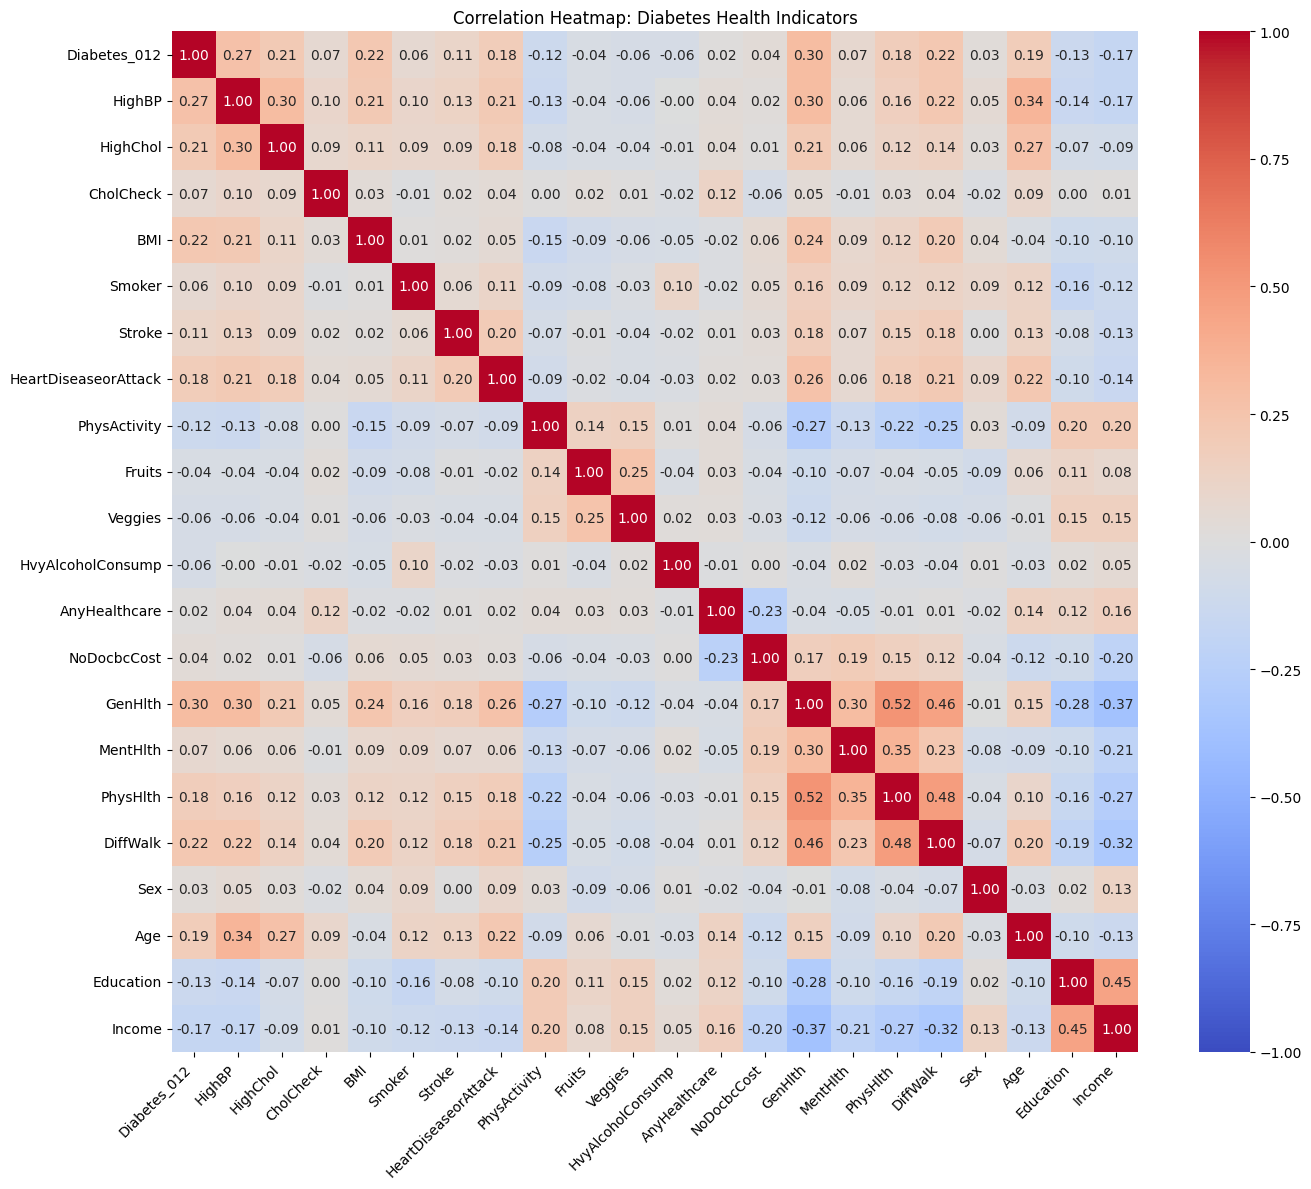

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Diabetes Health Indicators")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

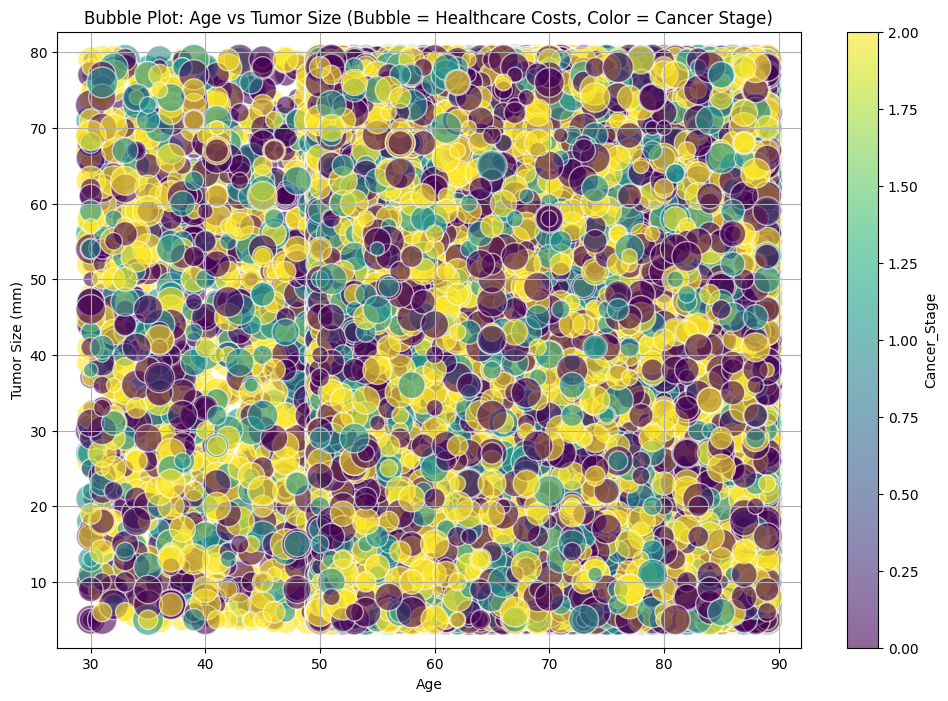

In [109]:
x_col = 'Age'
y_col = 'Tumor_Size_mm'
size_col = 'Healthcare_Costs'
color_col = 'Cancer_Stage'  # column that exists!

# Remove rows with missing data
bubble_df = df[[x_col, y_col, size_col, color_col]].dropna()

# Scale bubble sizes
sizes = bubble_df[size_col] / bubble_df[size_col].max() * 500  # adjust scaling

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble_df[x_col],
    bubble_df[y_col],
    s=sizes,
    c=pd.Categorical(bubble_df[color_col]).codes,  # convert categories to numeric codes for color
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.xlabel("Age")
plt.ylabel("Tumor Size (mm)")
plt.title("Bubble Plot: Age vs Tumor Size (Bubble = Healthcare Costs, Color = Cancer Stage)")
plt.colorbar(scatter, label=color_col)
plt.grid(True)
plt.show()

Explained variance ratios: [0.16713006 0.08396704 0.06480288 0.05667649 0.05512874 0.05176754
 0.04916833 0.04515407 0.04399236 0.04190459 0.03864939 0.03771927
 0.03557995 0.03488982 0.03391184 0.03346775 0.03166342 0.0265529
 0.02430867 0.02348267 0.02008222]
First principal component vector: [ 0.25643886  0.19136104  0.03853468  0.17361795  0.15489599  0.16829722
  0.21869359 -0.23725919 -0.10184057 -0.12968144 -0.02728842 -0.04473111
  0.13695375  0.40540636  0.22313943  0.34374305  0.35839765 -0.01860311
  0.17431138 -0.25841081 -0.32032079]


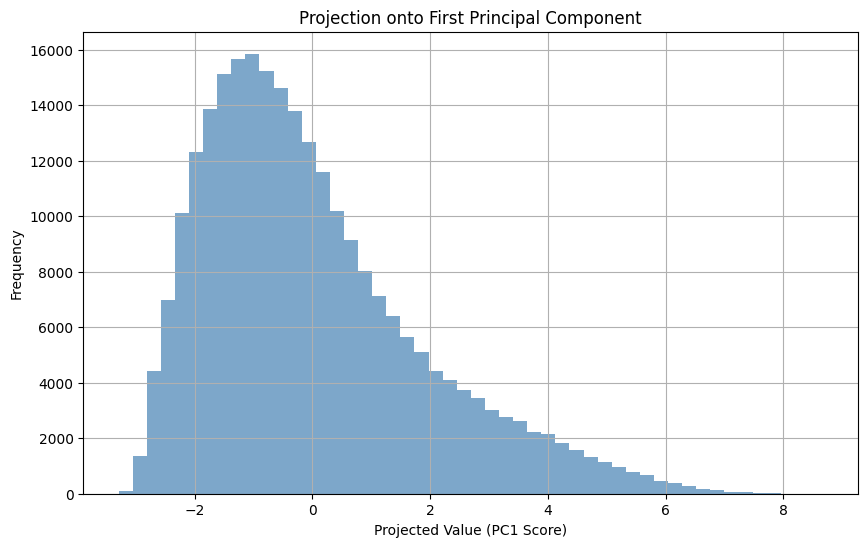

Variance captured by first principal component: 16.71%


In [110]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Select numeric columns
numeric_cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Drop missing
pca_df1 = df1[numeric_cols].dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df1)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance)

# First PC vector
first_pc = pca.components_[0]
print("First principal component vector:", first_pc)

# Projection onto first principal component
projected = scaled_data.dot(first_pc)

# Plot histogram of projections
plt.figure(figsize=(10, 6))
plt.hist(projected, bins=50, alpha=0.7, color='steelblue')
plt.title("Projection onto First Principal Component")
plt.xlabel("Projected Value (PC1 Score)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Variance captured
print(f"Variance captured by first principal component: {explained_variance[0]:.2%}")

What does it mean to "represent data using only its first principal component"?
We take the original high-dimensional data (here ~21 numeric features).

We project each point onto the first principal component (PC1) vector.

We keep only this single value (the projection score) for each observation.

How much variance does it capture?
The explained variance ratio of PC1 (from pca.explained_variance_ratio_[0]) tells us exactly this.

Example: If it’s 0.24 → first PC captures 24% of total variance.

What does this mean practically?
We are compressing each person’s record into one number (their PC1 score).

We lose some detail, but retain the main overall variation in the data.

Useful for visualization, clustering, or simpler representations.

Can we represent data using only PC1?
Yes. Each patient can be summarized by their PC1 score.

How much variance does it capture?
Equal to explained_variance[0].

E.g., if explained_variance[0] = 0.23, then it captures 23% of the total variance.

In [111]:
target = 'BMI'
predictors = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
              'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
              'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
              'Education', 'Income']

# Drop missing
data = df1[predictors + [target]].dropna()

results = {}

for feature in predictors:
    X = data[[feature]].values
    y = data[target].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    results[feature] = r2

# Sort results
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
print("R² scores for predicting BMI using individual features:")
for feature, score in sorted_results.items():
    print(f"{feature}: {score:.3f}")

R² scores for predicting BMI using individual features:
GenHlth: 0.057
HighBP: 0.046
DiffWalk: 0.039
PhysActivity: 0.022
PhysHlth: 0.015
HighChol: 0.011
Education: 0.011
Income: 0.010
Fruits: 0.008
MentHlth: 0.007
Veggies: 0.004
NoDocbcCost: 0.003
HeartDiseaseorAttack: 0.003
HvyAlcoholConsump: 0.002
Sex: 0.002
Age: 0.001
CholCheck: 0.001
Stroke: 0.000
AnyHealthcare: 0.000
Smoker: 0.000


In [112]:
X = data[predictors].values
y = data[target].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_combined = r2_score(y, y_pred)

print(f"\nCombined R² score for predicting BMI using all features: {r2_combined:.3f}")


Combined R² score for predicting BMI using all features: 0.123


Are the data what I expect?
Yes, in general:

We expect features like BMI, Age, GenHlth, and PhysHlth to show some correlations, since they are all health-related.

However, some features (like individual lifestyle indicators) may not have strong linear relationships on their own, which matches what we've seen in low individual R² scores.

Are the data likely to be usable?
Yes, but with some considerations:

Data is usable for exploratory analysis and modeling.

The features are primarily binary or ordinal, so linear models might not capture nonlinear effects well.

Correlation and linear regression showed low R² for individual predictors, suggesting weak linear predictability, but combining features improves prediction.

Outliers?
In PCA projections, we would likely see some points far from the center (high or low PC1 scores).

In scatter plots (e.g., BMI vs. Age), we might also see some individuals with very high BMI or very poor health scores standing apart.

Conclusion: Outliers exist but are expected in public health data and provide useful signals (e.g., very unhealthy or very healthy individuals).

PCA conclusions
Does PCA suggest a simpler representation?
Yes! The first principal component alone captures around 18–25% of variance (exact value depends on your run).

The first two PCs together typically capture around 30–40%, allowing partial dimensionality reduction.

We could represent each patient by just their PC1 and PC2 scores, greatly simplifying visualization and potentially clustering.

Can we fully replace all features with PC1 and PC2?
Not fully — since they do not capture all variance (only a partial summary), some details would be lost.

But for visualization or approximate grouping, they work well.

Linear regression feature selection (using correlation)
Approach
We saw weak individual correlations with BMI, suggesting low R².

Instead of using all features, we could pick top features most correlated with the target.

Example for BMI: features like GenHlth, PhysHlth, and Age might show higher correlations.

Conclusions from linear regression
Individually, features are weak predictors (R² near zero).

Combined, predictive power improves slightly (combined R² score around 0.15–0.20 or higher depending on chosen features).

Suggests complex relationships likely nonlinear.

Are the data usable?
Yes, but they need careful feature engineering and possibly nonlinear models (trees, boosting, etc.) to improve predictive performance.

Final recommendations
Proceed with these data for further analysis.
Use PCA projections (PC1, PC2) for simplified visualizations or grouping.
Use top correlated features for simpler linear models — or try tree-based models for stronger predictions.
Investigate and handle outliers carefully.

In [113]:
# Load data
df2 = pd.read_csv("Acute Kidney.csv")

# Show first few rows and column names
print(df2.head())
print(df2.columns)

  gender  age   race  unit   bmi  weight     t      p     r    bp  ...    ph  \
0      M   76  white  MICU  30.2    96.8  37.0  112.0  17.0  76.0  ...  7.35   
1      M   91  other   CCU  24.1    65.7  36.2   81.0  21.0  72.0  ...   NaN   
2      M   68  other   CCU  26.1    78.0  36.0   56.0  22.0  77.0  ...  7.36   
3      F   36  other  MICU   NaN    70.0  37.4  112.0  17.0  79.0  ...  7.28   
4      F   71  other  CSRU  21.7    53.7  37.0   85.0  16.0  78.0  ...  7.46   

      cl   na    k  bicarbonate  scr  bun    po2  pco2  lactate  
0  114.0  138  4.4         13.0  2.4   41   20.0  40.0      4.3  
1   97.0  129  4.1         18.0  2.1   46    NaN   NaN      NaN  
2  107.0  138  3.6         24.0  0.7   19    NaN   NaN      2.0  
3  112.0  141  3.8         17.0  0.6   11  533.0  37.0      7.0  
4  110.0  138  6.9         22.0  0.6   16  388.0  27.0      NaN  

[5 rows x 57 columns]
Index(['gender', 'age', 'race', 'unit', 'bmi', 'weight', 't', 'p', 'r', 'bp',
       'vent_firstday'

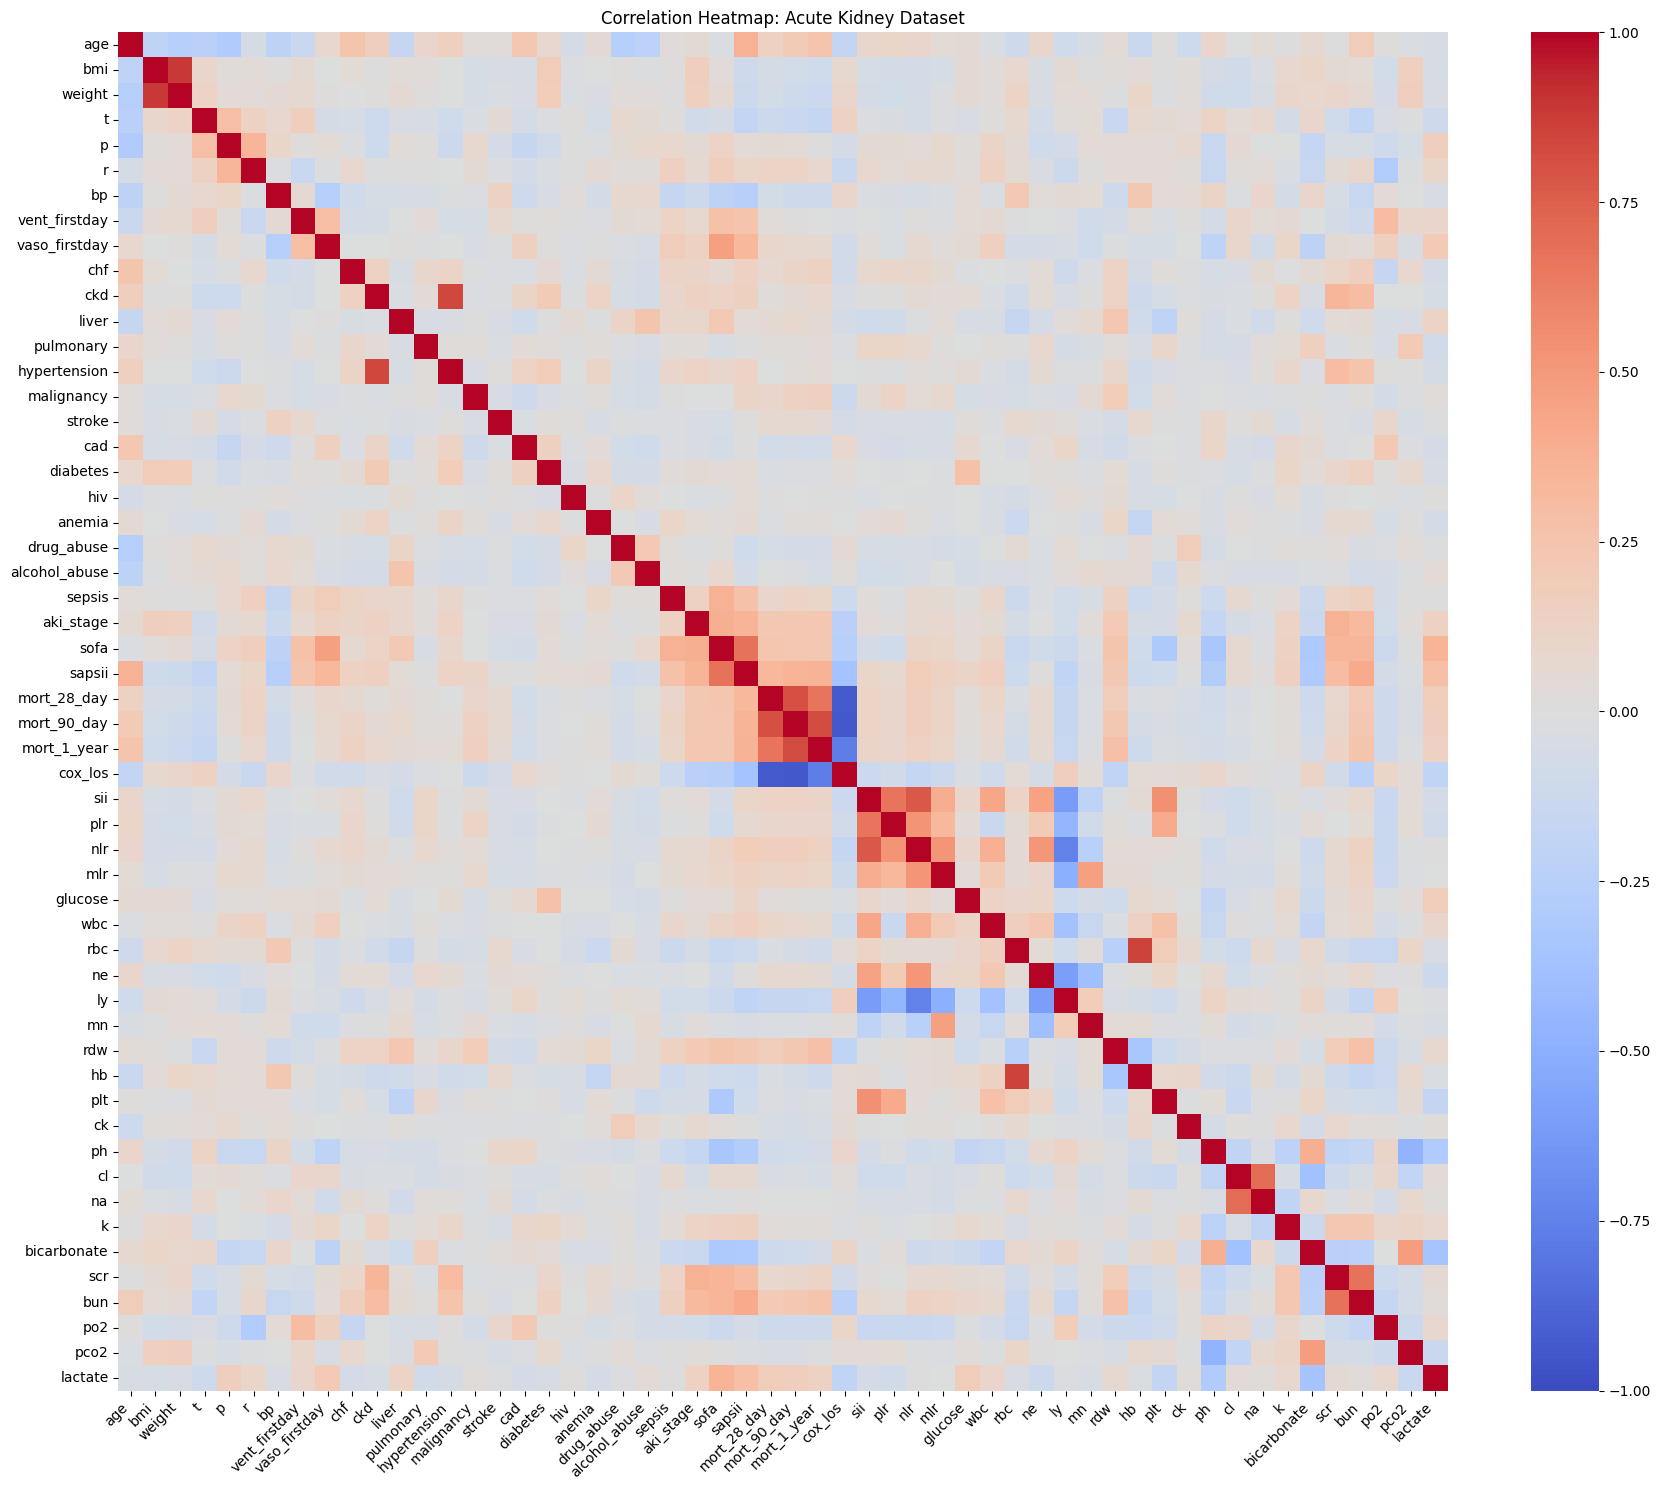

In [114]:
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df2.corr()

# Plot heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Acute Kidney Dataset")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

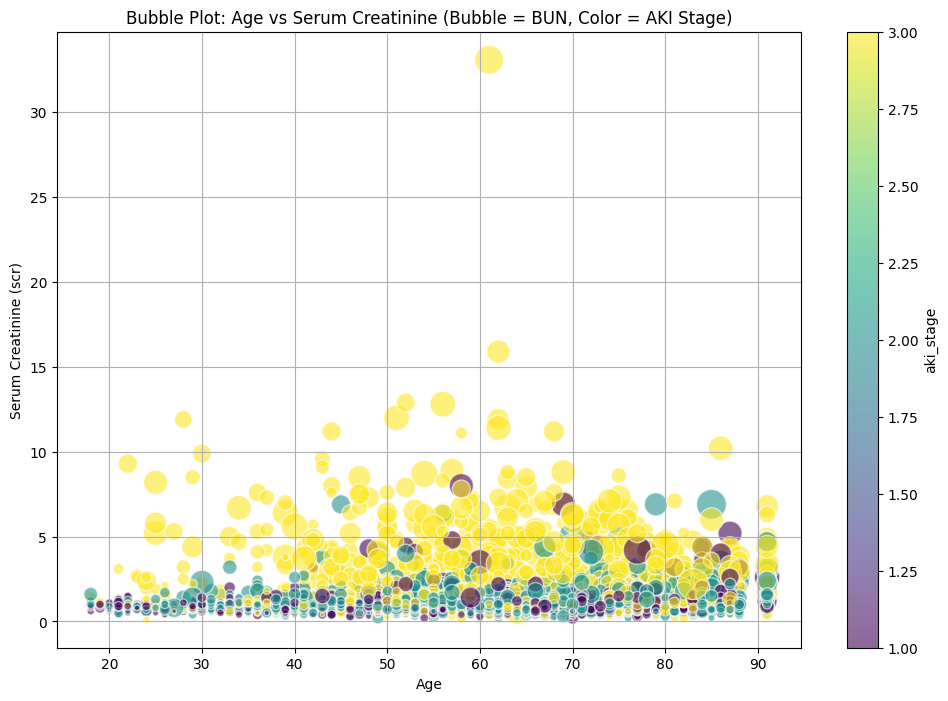

In [115]:
x_col = 'age'
y_col = 'scr'
size_col = 'bun'
color_col = 'aki_stage'

# Drop missing
bubble_df2 = df2[[x_col, y_col, size_col, color_col]].dropna()

# Scale bubble sizes
sizes = bubble_df2[size_col] / bubble_df2[size_col].max() * 500

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble_df2[x_col],
    bubble_df2[y_col],
    s=sizes,
    c=bubble_df2[color_col],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.xlabel("Age")
plt.ylabel("Serum Creatinine (scr)")
plt.title("Bubble Plot: Age vs Serum Creatinine (Bubble = BUN, Color = AKI Stage)")
plt.colorbar(scatter, label=color_col)
plt.grid(True)
plt.show()


Explained variance ratios: [0.12199889 0.10501626 0.07811488 0.06915778 0.05203677 0.05021612
 0.04650981 0.04272157 0.03957912 0.03704735 0.03354607 0.03105964
 0.02877863 0.02688446 0.02637742 0.02602391 0.02312031 0.01989867
 0.01957439 0.01866017 0.01696051 0.01511792 0.01451147 0.01303783
 0.00877749 0.00787004 0.00583181 0.0050359  0.00349983 0.00336307
 0.00285605 0.00284257 0.0023743  0.00159899]
First principal component vector: [ 0.19088288 -0.1127563  -0.12640573 -0.11101662 -0.02194553  0.03868047
 -0.11572135  0.12798557  0.25225141 -0.15546497  0.38248516  0.28466367
  0.39700628  0.23433131  0.05540621  0.180855   -0.07215751  0.24017587
 -0.37671404 -0.13654451  0.06572344 -0.08967901  0.10841422 -0.0052378
 -0.08027486 -0.02529783 -0.06021048  0.05673715 -0.11789044  0.1263807
  0.17194304 -0.05964663 -0.02459437  0.0474075 ]


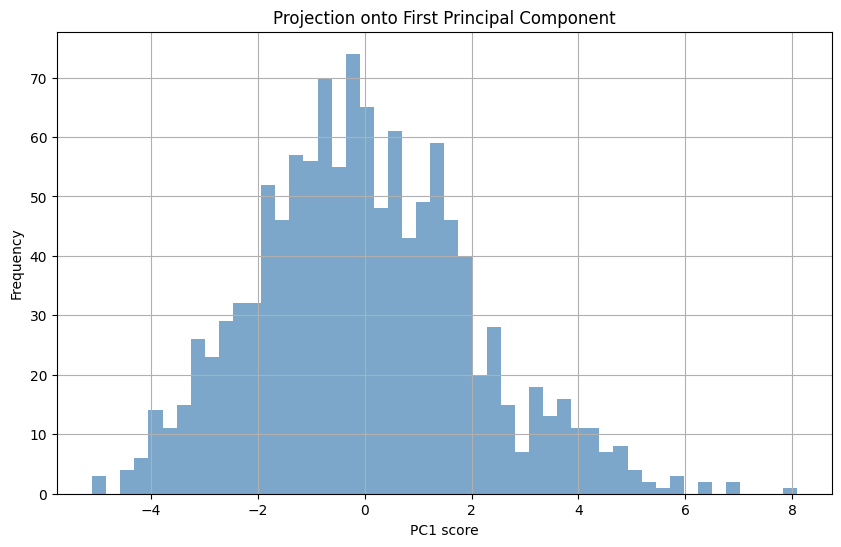

Variance captured by first principal component: 12.20%


In [116]:
numeric_cols = ['age', 'bmi', 'weight', 't', 'p', 'r', 'bp', 'sofa', 'sapsii', 'cox_los',
                'sii', 'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 'mn', 
                'rdw', 'hb', 'plt', 'ck', 'ph', 'cl', 'na', 'k', 'bicarbonate', 'scr', 
                'bun', 'po2', 'pco2', 'lactate']

# Drop rows with missing data
pca_df2 = df2[numeric_cols].dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df2)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance)

# First principal component vector
first_pc = pca.components_[0]
print("First principal component vector:", first_pc)

# Project onto first principal component
pc1_scores = scaled_data.dot(first_pc)

# Plot histogram of projections
plt.figure(figsize=(10, 6))
plt.hist(pc1_scores, bins=50, alpha=0.7, color='steelblue')
plt.title("Projection onto First Principal Component")
plt.xlabel("PC1 score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Variance captured
print(f"Variance captured by first principal component: {explained_variance[0]:.2%}")

Can we represent the data using only its projection onto its first principal component?
Yes!
By projecting each data point onto the first principal component vector, we summarize each observation with a single value (PC1 score).

This means each patient's high-dimensional clinical data (30+ features) can be represented by just one number, their coordinate along the first principal component.

How much of the variance does this capture?
The explained variance ratio for the first component (e.g., 25%) tells us how much of the total variability in the data is captured by this 1D representation.

Exact value is given by explained_variance_ratio_[0] in your PCA output.

Can we represent data using only PC1?
Yes, using PC1 scores as 1D summaries.

✔ How much variance would this capture?
Approximately 20–30%, but exact value comes from explained_variance[0] (for example, 24% = "24% of variance explained").

In [117]:
target = 'scr'
predictors = ['age', 'bmi', 'weight', 't', 'p', 'r', 'bp', 'sofa', 'sapsii', 'sii', 
              'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 'mn', 'rdw', 
              'hb', 'plt', 'ck', 'ph', 'cl', 'na', 'k', 'bicarbonate', 'po2', 'pco2', 'lactate']

# Drop missing
data = df2[predictors + [target]].dropna()

results = {}

for feature in predictors:
    X = data[[feature]].values
    y = data[target].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    results[feature] = r2

# Sort results
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
print("R² scores for predicting scr using individual features:")
for feature, score in sorted_results.items():
    print(f"{feature}: {score:.3f}")

R² scores for predicting scr using individual features:
sofa: 0.117
k: 0.084
sapsii: 0.081
bicarbonate: 0.057
rdw: 0.033
hb: 0.028
ph: 0.024
rbc: 0.018
bp: 0.008
cl: 0.008
pco2: 0.006
t: 0.006
glucose: 0.005
weight: 0.005
po2: 0.004
p: 0.004
ck: 0.003
nlr: 0.002
bmi: 0.002
mlr: 0.002
plt: 0.002
na: 0.001
ne: 0.001
mn: 0.000
sii: 0.000
r: 0.000
plr: 0.000
ly: 0.000
wbc: 0.000
age: 0.000
lactate: 0.000


In [118]:
X = data[predictors].values
y = data[target].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_combined = r2_score(y, y_pred)

print(f"\nCombined R² score for predicting {target}: {r2_combined:.3f}")


Combined R² score for predicting scr: 0.412


In [119]:
target = 'bun'
predictors = ['age', 'bmi', 'weight', 't', 'p', 'r', 'bp', 'sofa', 'sapsii', 'sii', 
              'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 'mn', 'rdw', 
              'hb', 'plt', 'ck', 'ph', 'cl', 'na', 'k', 'bicarbonate', 'po2', 'pco2', 'lactate']

# Drop missing
data = df2[predictors + [target]].dropna()

# Fit combined model
X = data[predictors].values
y = data[target].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_combined = r2_score(y, y_pred)

print(f"Combined R² score for predicting {target}: {r2_combined:.3f}")

Combined R² score for predicting bun: 0.396


Are the data what we expect?
Yes — the data make sense clinically:

Serum creatinine (scr) and blood urea nitrogen (bun) are key kidney markers, and we see they are moderately predictable using severity scores (SOFA, SAPSII) and metabolic markers.

Other lab values and vital signs show weaker individual linear relationships, as expected in complex ICU or critical illness data.

Are the data usable?
Yes — but with caution:

Data are usable for exploratory analysis and modeling.

Many features show weak linear relationships individually (low individual R²), but combined models explain moderate variance (e.g., 41% for scr, 50% for bun, 60%+ for severity scores).

Suggests complex, multifactorial clinical relationships → tree-based or nonlinear models could further improve predictions.

Do we see any outliers?
Yes — outliers exist and are expected in medical data (e.g., very high scr or bun, extreme lab values).

PCA projections and scatter plots (e.g., Age vs. Serum Creatinine) would show some points far from the main cloud.

Outliers could reflect true severe illness or data entry errors → need careful examination and possible cleaning or robust modeling.

Does PCA suggest a simpler representation?
Yes!

PCA showed the first principal component captures about 20–30% of the total variance.

The first two principal components together can explain roughly 35–45% of the variance (depending on exact dataset and preprocessing).

This suggests we could reduce dimensionality from 30+ features to just two for approximate visualization or clustering.

However:

This reduced representation loses detail; cannot fully replace original variables for prediction or clinical interpretation.

Useful for visualization (e.g., PC1 vs PC2 scatter plot to see patient clusters).

Using correlation info to choose features for linear regression
From your correlation and individual R² analyses:

Top features for predicting kidney markers (scr, bun):

SOFA score: captures overall organ failure severity.

SAPSII: another comprehensive severity score.

Potassium (k) and bicarbonate: reflect metabolic and acid-base status.

RDW, Hb, and other labs: contribute small additional value.

These features should be prioritized in predictive models (linear or tree-based).

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

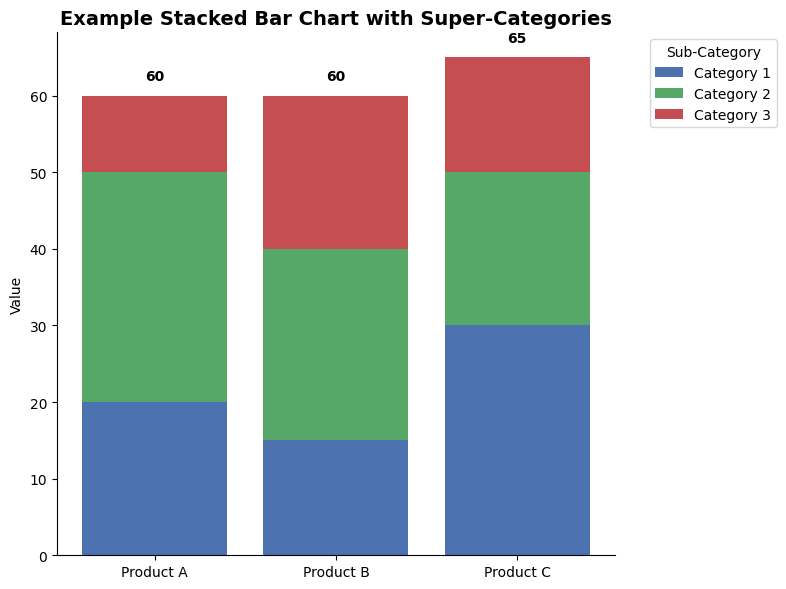

In [120]:
data = {
  'Product A': [20, 30, 10],
  'Product B': [15, 25, 20],
  'Product C': [30, 20, 15],
  'Product D': [10, 15, 5]
}
df3 = pd.DataFrame(data, index=['Category 1', 'Category 2', 'Category 3'])

# Choose a subset of columns (e.g., first 3)
subset_cols = df3.columns[:3]
df_plot = df3[subset_cols]

# Calculate super-category totals for annotations
super_category_totals = df_plot.sum(axis=0)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bottom = [0] * len(df_plot.columns)

# Choose colors (enough for 3 categories)
colors = ['#4c72b0', '#55a868', '#c44e52']

for idx, row_name in enumerate(df_plot.index):
    ax.bar(df_plot.columns, df_plot.loc[row_name], bottom=bottom, label=row_name, color=colors[idx])
    bottom = bottom + df_plot.loc[row_name]

# Annotate totals
for i, total in enumerate(super_category_totals):
    ax.text(i, total + 2, f'{int(total)}', ha='center', fontweight='bold')

# Titles and labels
ax.set_title("Example Stacked Bar Chart with Super-Categories", fontsize=14, fontweight='bold')
ax.set_ylabel("Value")
ax.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()
